# Sistema de importancia

Cuando no se tiene la misma cantidad de puntos para cada clase el clasificador pude sesgar el resultado, entonces se debe ajustar para que el sistema cuente con este desequilibrio de clase

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from utilities import visualize_classifier

In [8]:
#Cargamos los datos
input_file = 'data_imbalance.txt'
data  = np.loadtxt(input_file, delimiter=',')
X,y = data[:,:-1], data[:, -1]

#separamos las clases
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

Text(0.5, 1.0, 'Datos de entrada')

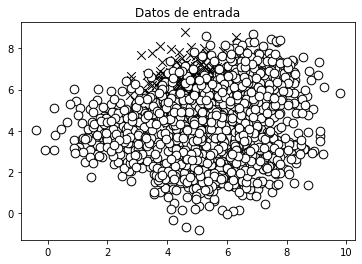

In [9]:
#Visualizamos los datos 
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1],s=75, facecolors='black',edgecolors='black',linewidth=1,marker='x')
plt.scatter(class_1[:,0], class_1[:,1],s=75, facecolors='white',edgecolors='black',linewidth=1,marker='o')
plt.title('Datos de entrada')

In [23]:
#Dividimos datos entre entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [27]:
#Clasificador extremadamente aleatorio 

def forest_classifier(balance=''):
    params={'n_estimators':100, 'max_depth':4,'random_state':0}
    
    if balance=='balance':
        params={'n_estimators':100, 'max_depth':4,'random_state':0, 'class_weight':'balanced'}
    
        
    classifier = ExtraTreesClassifier(**params)
    classifier.fit(X_train, y_train)
    print("\nDatos de entrenamiento clasificados \n")
    visualize_classifier(classifier, X_train, y_train)
    
    
    
    y_test_pred = classifier.predict(X_test)
    print("\nDatos de prueba clasificados \n")
    visualize_classifier(classifier, X_test, y_test)
    
    print("\nDatos X_test y y_test_pred \n")
    visualize_classifier(classifier, X_test, y_test_pred)
    
    # Evaluate classifier performance
    class_names = ['Class-0', 'Class-1']
    print("\n" + "#"*40)
    print("\nClassifier performance on training dataset\n")
    print(classification_report(y_train, classifier.predict(X_train),target_names=class_names))
    print("#"*40 + "\n")
    print("#"*40)
    print("\nClassifier performance on test dataset\n")
    print(classification_report(y_test, y_test_pred, target_names=class_names))
    print("#"*40 + "\n")
    


Datos de entrenamiento clasificados 



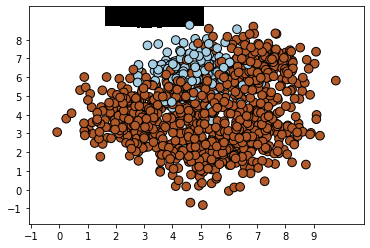


Datos de prueba clasificados 



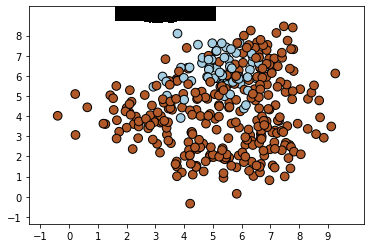


Datos X_test y y_test_pred 



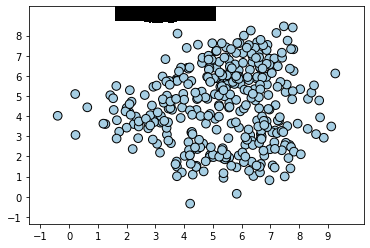


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       1.00      0.01      0.01       181
     Class-1       0.84      1.00      0.91       944

    accuracy                           0.84      1125
   macro avg       0.92      0.50      0.46      1125
weighted avg       0.87      0.84      0.77      1125

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.00      0.00      0.00        69
     Class-1       0.82      1.00      0.90       306

    accuracy                           0.82       375
   macro avg       0.41      0.50      0.45       375
weighted avg       0.67      0.82      0.73       375

########################################



/home/andres/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
forest_classifier()

La alerta anterior se debe a que en la calificación de la clase_0 hay una división por cero, esto se debe al desvalance en las clases


Datos de entrenamiento clasificados 



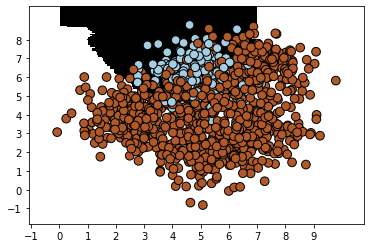


Datos de prueba clasificados 



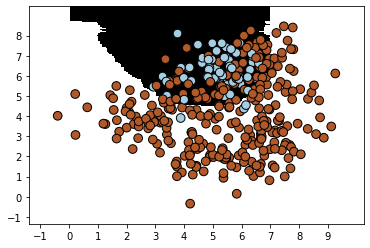


Datos X_test y y_test_pred 



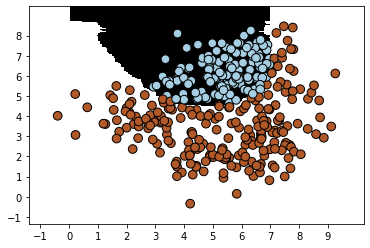


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375

########################################



In [29]:
forest_classifier('balance')